In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义正态分布的概率密度函数
def normal_pdf(x, mean, std):
    return 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean) / std) ** 2)


In [2]:
# 观察值
observations = np.array([-3.9847, -3.5549, -1.2401, -0.9780, -0.7932, -2.8531,
                         -2.7605, -3.7287, -3.5414, -2.2692, -3.4549, -3.0752,
                         -3.9934, 2.8792, -0.9780, 0.7932, 1.1882, 3.0682,
                         -1.5799, -1.4885, -0.7431, -0.4221, -1.1186, 4.2532])

# 先验概率
prior_normal = 0.9
prior_abnormal = 0.1

# 类条件概率密度参数
mean_normal, std_normal = -2, 0.25
mean_abnormal, std_abnormal = 2, 4

# 计算两个类别的p(x|wi)
px_normal = normal_pdf(observations, mean_normal, std_normal)
px_abnormal = normal_pdf(observations, mean_abnormal, std_abnormal)

# 计算p(x)=sum(p(x|wi)*wi)
px = px_normal * prior_normal + px_abnormal * prior_abnormal

# 计算后验概率p(wi)
p_normal = px_normal * prior_normal / px
p_abnormal = px_abnormal * prior_abnormal / px
# 计算最小错误率下题目样本选取的后验概率
judge = np.max(np.vstack([p_normal, p_abnormal]), axis=0)

# 根据最小错误率预测类别
results = np.zeros(observations.shape[0])
results[p_normal > p_abnormal] = 1

results

array([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0.])

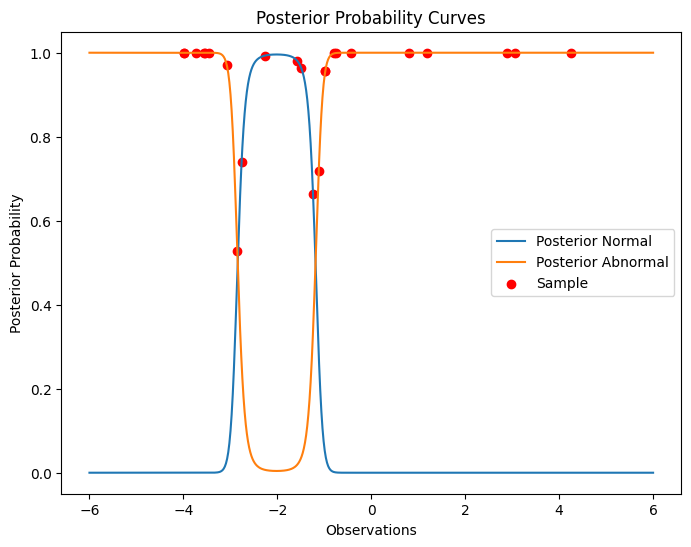

In [3]:
# 绘制后验概率图
x = np.linspace(-6, 6, num=1000)  # 选择适当的数量，这里选择1000个点

# 计算两个类别的p(x|wi)
px_normal_ = normal_pdf(x, mean_normal, std_normal)
px_abnormal_ = normal_pdf(x, mean_abnormal, std_abnormal)

# 计算p(x)=sum(p(x|wi)*wi)
px_ = px_normal_ * prior_normal + px_abnormal_ * prior_abnormal

# 计算后验概率p(wi)
p_normal_ = px_normal_ * prior_normal / px_
p_abnormal_ = px_abnormal_ * prior_abnormal / px_

# 绘制后验概率曲线
plt.figure(figsize=(8, 6))
plt.plot(x, p_normal_, label='Posterior Normal')
plt.plot(x, p_abnormal_, label='Posterior Abnormal')
plt.scatter(observations, judge, label='Sample', c='r')
plt.xlabel('Observations')
plt.ylabel('Posterior Probability')
plt.legend()
plt.title('Posterior Probability Curves')
plt.show()

In [4]:
# 最小风险贝叶斯决策的决策表
cost_matrix = np.array([[0, 6], [1, 0]])
r1 = cost_matrix[0, 0] * p_normal + cost_matrix[0, 1] * p_abnormal
r2 = cost_matrix[1, 0] * p_normal + cost_matrix[1, 1] * p_abnormal

results2 = np.zeros(observations.shape[0])
results2[r1 < r2] = 1

results2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0.])

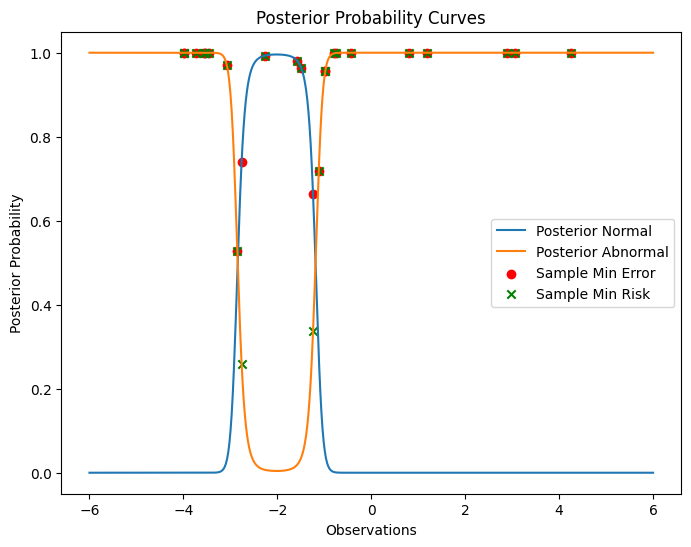

In [5]:
# 计算最小风险值下题目样本选取的后验概率
judge2 = np.where(r1 < r2, p_normal, p_abnormal)

# 绘制后验概率曲线
plt.figure(figsize=(8, 6))
plt.plot(x, p_normal_, label='Posterior Normal')
plt.plot(x, p_abnormal_, label='Posterior Abnormal')
plt.scatter(observations, judge, label='Sample Min Error', c='r')
plt.scatter(observations, judge2, label='Sample Min Risk', c='g', marker='x')
plt.xlabel('Observations')
plt.ylabel('Posterior Probability')
plt.legend()
plt.title('Posterior Probability Curves')
plt.show()